In [579]:
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr

In [580]:
data4 = xr.open_dataset("PSI_non_dim_full_form_visc_low_res.nc")

In [581]:
a1 = np.array([-1,0,1,2])
a2 = np.ones(len(a1))
np.heaviside(-1*(a1-a2),1)

array([1., 1., 1., 0.])

In [582]:
N_list = [(1*10**(-5))**(0.5)]  # np.linspace((1e-7)**(0.5),(8e-4)**(0.5),51)  # np.array([(1e-5)**(0.5)])  # stratification
theta = 5*10**(-3)
delta_list = [0.5]  # np.linspace(0, 1, 26)
f = 10**(-4)
S2 = N_list[0]**2*theta**2/f**2
gm = (1+S2)**(-1)
beta = (1 + S2)**(-0.5)
Gshear = N_list[0]**2*theta*gm/f
Ri = N_list[0]**2*(1-gm)/Gshear**2

In [583]:
def vsz(t):
    return 1 + beta**(-2)*(np.cos(beta*t)-1)

In [584]:
def usz(t):
    return beta**(-1)*(np.sin(beta*t))

In [585]:
def bsz(t):
    return beta**(-2)*(np.cos(beta*t)-1)

In [586]:
data4.t

<xarray.DataArray 't' (t: 12)>
array([0.      , 0.56419 , 1.12838 , 1.692569, 2.256759, 2.820949, 3.385139,
       3.949329, 4.513519, 5.077708, 5.641898, 6.206088])
Coordinates:
  * t        (t) float64 0.0 0.5642 1.128 1.693 ... 4.514 5.078 5.642 6.206

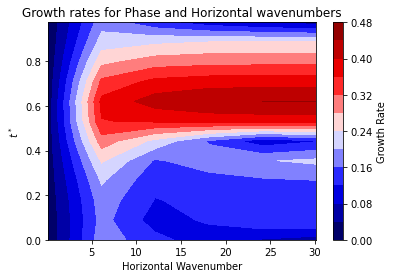

In [587]:
plt.contourf(data4.k, data4.t*beta/(2*np.pi), data4.growth_rate.isel(N=0, delta=0,gamma_index=0), cmap="seismic", levels=12)
plt.colorbar(label="Growth Rate")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("$t^*$")
plt.title("Growth rates for Phase and Horizontal wavenumbers")
plt.savefig("grwthrt_wv_nmbr_phs.pdf")
plt.show()

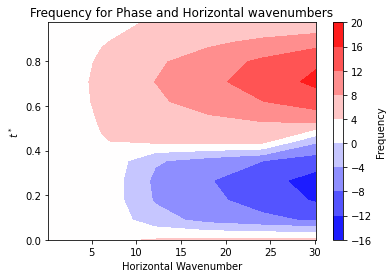

In [588]:
plt.contourf(data4.k,data4.t*beta/(2*np.pi), data4.oscillation.isel(N=0, gamma_index=0,delta=0),cmap="bwr")
plt.colorbar(label="Frequency")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("$t^*$")
plt.title("Frequency for Phase and Horizontal wavenumbers")
plt.savefig("frqncy_wv_nmbr_phs.pdf")
plt.show()

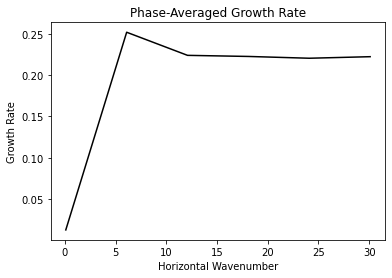

In [589]:
plt.plot(data4.k, data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']),c="k")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")
plt.title("Phase-Averaged Growth Rate")
plt.savefig("phs_avg_grwth_rt.pdf")
plt.show()

Text(0, 0.5, 'Growth Rate')

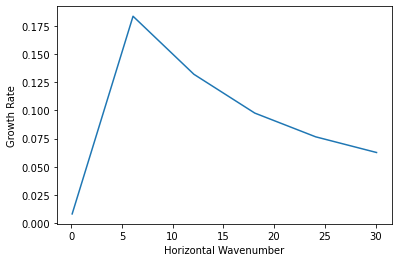

In [590]:
plt.plot(data4.k, data4.growth_rate.isel(N=0, delta=0,gamma_index=0, t=0))
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")

In [591]:
idx = data4.growth_rate.isel(N=0, delta=0,gamma_index=0).idxmax(dim="k")
# idx = data4.growth_rate.isel(N=0, delta=0, gamma_index=0).mean(['t']).idxmax(dim="k")

# data4.growth_rate.isel(N=0, delta=0, gamma_index=0).sel(k=idx)

# idx = np.unique(idx)
# idx =  data4.k
# idx = np.array([idx[-1]])

In [592]:
idx

<xarray.DataArray 'k' (t: 12)>
array([ 6.1,  6.1,  6.1,  6.1,  6.1,  6.1, 30.1, 30.1, 30.1, 30.1, 24.1,
        6.1])
Coordinates:
    N            float64 0.003162
    delta        float64 0.5
    gamma_index  float64 0.0
  * t            (t) float64 0.0 0.5642 1.128 1.693 ... 4.514 5.078 5.642 6.206

In [593]:
data4.growth_rate.isel(N=0, delta=0,gamma_index=0).mean(['t']).idxmax()

<xarray.DataArray 'k' ()>
array(6.1)
Coordinates:
    N            float64 0.003162
    delta        float64 0.5
    gamma_index  float64 0.0

In [594]:
data5 = xr.open_dataset("PSI_non_dim_field_low_res.nc")

In [595]:
data5

<xarray.Dataset>
Dimensions:      (z: 64, x: 64, t: 12, k: 6)
Coordinates:
  * z            (z) float64 0.0003012 0.00271 0.00752 ... 1.992 1.997 2.0
  * x            (x) float64 0.0 0.01587 0.03175 0.04762 ... 0.9683 0.9841 1.0
  * t            (t) float64 0.0 0.5642 1.128 1.693 ... 4.514 5.078 5.642 6.206
  * k            (k) float64 0.1 6.1 12.1 18.1 24.1 30.1
Data variables:
    u_structure  (t, k, z, x) float64 ...
    v_structure  (t, k, z, x) float64 ...
    w_structure  (t, k, z, x) float64 ...
    b_structure  (t, k, z, x) float64 ...
    x_domain     (t, k, z) float64 ...

In [596]:
np.array([data5.z]).T*np.ones((64,64))

array([[3.01181304e-04, 3.01181304e-04, 3.01181304e-04, ...,
        3.01181304e-04, 3.01181304e-04, 3.01181304e-04],
       [2.70954332e-03, 2.70954332e-03, 2.70954332e-03, ...,
        2.70954332e-03, 2.70954332e-03, 2.70954332e-03],
       [7.52046540e-03, 7.52046540e-03, 7.52046540e-03, ...,
        7.52046540e-03, 7.52046540e-03, 7.52046540e-03],
       ...,
       [1.99247953e+00, 1.99247953e+00, 1.99247953e+00, ...,
        1.99247953e+00, 1.99247953e+00, 1.99247953e+00],
       [1.99729046e+00, 1.99729046e+00, 1.99729046e+00, ...,
        1.99729046e+00, 1.99729046e+00, 1.99729046e+00],
       [1.99969882e+00, 1.99969882e+00, 1.99969882e+00, ...,
        1.99969882e+00, 1.99969882e+00, 1.99969882e+00]])

In [597]:
vsz(data5.t[q]).values*np.ones((64,64))

array([[-0.76846777, -0.76846777, -0.76846777, ..., -0.76846777,
        -0.76846777, -0.76846777],
       [-0.76846777, -0.76846777, -0.76846777, ..., -0.76846777,
        -0.76846777, -0.76846777],
       [-0.76846777, -0.76846777, -0.76846777, ..., -0.76846777,
        -0.76846777, -0.76846777],
       ...,
       [-0.76846777, -0.76846777, -0.76846777, ..., -0.76846777,
        -0.76846777, -0.76846777],
       [-0.76846777, -0.76846777, -0.76846777, ..., -0.76846777,
        -0.76846777, -0.76846777],
       [-0.76846777, -0.76846777, -0.76846777, ..., -0.76846777,
        -0.76846777, -0.76846777]])

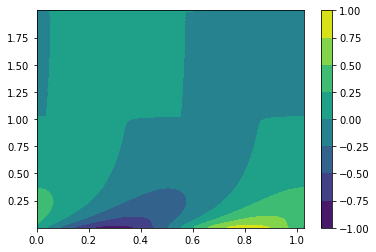

In [609]:
q = 8
i = 6.1 #idx[q]
vz = vsz(data5.t[q]).values*np.ones((64,64))
v=data5.v_structure.isel(t=q).sel(k=i,method="nearest") #+1 #vz*(1-np.array([data5.z]).T*np.ones((64,64)))
# w=data5.b_structure.isel(t=q).sel(k=i,method="nearest")
z = np.array([data5.z]).T*np.ones((64,64))
plt.contourf(data5.x_domain.isel(t=q).sel(k=i,method="nearest"), np.array(data5.z), v)
plt.colorbar()

# plt.contour(data5.x_domain.isel(t=q).sel(k=i,method="nearest"), np.array(data5.z), data5.b_structure.isel(t=q).sel(k=i,method="nearest"),cmap="gray")
plt.show()

AttributeError: 'Dataset' object has no attribute 'v_structure_complex'

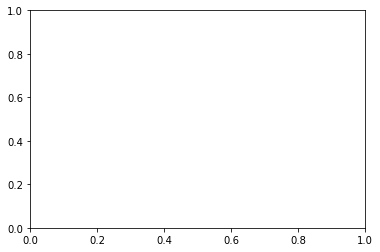

In [317]:
nz = 128
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, nz)
q = 3
i =  30.1 #idx[q]
ti =  q
total_t_v = np.zeros((nz, nz))
total_t_b = np.zeros((nz, nz))
# for i in idx:
# i = idx[ti]
omega_r = data4.growth_rate.isel(N=0, delta=0, t=q).sel(k=i)
omega_i = data4.oscillation.isel(N=0, delta=0,  t=q).sel(k=i)
total_v = np.real(np.array([data5.v_structure.isel(t=ti).sel(k=i)+1j*data5.v_structure_complex.isel(t=ti).sel(k=i)]).T@np.array([np.exp(1j*np.array([i])*x_domain)]))
mx_v = np.max(total_v)
total_v = total_v/mx_v
total_t_v += total_v
total_b = np.real(np.array([data5.b_structure.isel(t=ti).sel(k=i)+1j*data5.b_structure_complex.isel(t=ti).sel(k=i)]).T@np.array([np.exp(1j*np.array([i])*x_domain)]))
mx_b = np.max(total_b)
total_b = total_b/mx_b
total_t_b += total_b
plt.contourf(np.array(x_domain), np.array(data5.z), total_t_v) #+0.5*usz(ti)*(1-np.array([data5.z]).T)+np.array([data5.z]).T
plt.colorbar(label="v-velocity")
# plt.contour(np.array(x_domain), np.array(data5.z),  total_t_b) # +gm**(-1)*Ri**(-1)*np.array([x_domain])+np.array([data5.z]).T+gm/(1-gm)+gm**(-1)*Ri**(-1)*0.5*bsz(ti)*(1-np.array([data5.z]).T)
plt.title("u-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
plt.ylabel("z")
plt.xlabel("x")

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
nz = 64
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, nz)

def animate(ti):
    plt.clf()
    total_t_v = np.zeros((nz, nz))
    total_t_b = np.zeros((nz, nz))
    # for i in idx:
    # i = idx[ti]
    total_v = np.real(np.array([data5.u_structure.isel(t=ti).sel(k=i)+1j*data5.u_structure_complex.isel(t=ti).sel(k=i)]).T*np.array([np.exp(1j*np.array([i])*x_domain)]))
    mx_v = np.max(total_v)
    total_v = total_v/mx_v
    total_t_v += total_v
    total_b = np.real(np.array([data5.b_structure.isel(t=ti).sel(k=i)+data5.b_structure_complex.isel(t=ti).sel(k=i)]).T*np.array([np.exp(1j*np.array([i])*x_domain)]))
    mx_b = np.max(total_b)
    total_b = total_b/mx_b
    total_t_b += total_b
    plt.contourf(np.array(x_domain), np.array(data5.z), total_t_v+0.5*vsz(ti)*(1-np.array([data5.z]).T)+np.array([data5.z]).T) # 
    plt.colorbar(label="v-velocity")
    plt.contour(np.array(x_domain), np.array(data5.z),  total_t_b+gm**(-1)*Ri**(-1)*np.array([x_domain])+np.array([data5.z]).T+gm/(1-gm)+gm**(-1)*Ri**(-1)*0.5*bsz(ti)*(1-np.array([data5.z]).T),cmap="grey")
    plt.title("u-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5) 
anim.save('PSI_u_structure_fastest_mode_each_time.gif') 
plt.close()
# anim.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()
x_domain = np.linspace(0, 2*np.pi/4, 256)

def animate(ti):
    plt.clf()
    total_t_v = np.zeros((256, 256))
    total_t_b = np.zeros((256, 256))
    for i in idx:
        total_v = np.real(np.array([data5.u_structure.isel(t=ti).sel(k=i)+data5.u_structure_complex.isel(t=ti).sel(k=i)]).T*np.array([np.exp(1j*np.array([i])*x_domain)]))
        mx_v = np.max(total_v)
        total_v = total_v/mx_v
        total_t_v += total_v
        total_b = np.real(np.array([data5.b_structure.isel(t=ti).sel(k=i)+data5.b_structure_complex.isel(t=ti).sel(k=i)]).T*np.array([np.exp(1j*np.array([i])*x_domain)]))
        mx_b = np.max(total_b)
        total_b = total_b/mx_b
        total_t_b += total_b
    plt.contourf(np.array(x_domain), np.array(data5.z), total_t_v+0.5*vsz(ti)*(1-np.array([data5.z]).T)+np.array([data5.z]).T) # 
    plt.colorbar(label="v-velocity")
    plt.contour(np.array(x_domain), np.array(data5.z),  total_t_b+gm**(-1)*Ri**(-1)*np.array([x_domain])+np.array([data5.z]).T+gm/(1-gm)+gm**(-1)*Ri**(-1)*0.5*bsz(ti)*(1-np.array([data5.z]).T),cmap="grey")
    plt.title("u-velocity structure at $t^*$ = "+str(round(np.array(data5.t[ti])*beta/(2*np.pi),2)))
    plt.ylabel("z")
    plt.xlabel("x")

frms = len(data5.t)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms, interval=1000)
# writervideo = matplotlib.animation.FFMpegWriter(fps=0.5) 
anim.save('PSI_u_structure_largest_growing_mode.gif') 
plt.close()
# anim.show()

In [ ]:
# np.array(data5.z)

In [ ]:
np.shape(total)

In [ ]:
np.shape(np.array(x_domain))

In [ ]:
np.shape(x_domain)

In [ ]:
plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)/data5.v_structure.isel(k=-1).max())  # f/theta*S2*data5.z background shear
plt.ylabel("Time")
plt.xlabel("z")
plt.title("Largest Growing Mode Normalized Vertical Structure")
plt.colorbar()
# plt.xlabel("v-velocity")

In [ ]:
plt.plot(data5.z, data5.v_structure.isel(k=-1,t=6))

In [ ]:
plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)+data5.z-0.9*vsz(data5.t)*(1-data5.z))  # f/theta*S2*data5.z background shear
plt.ylabel("Time")
plt.colorbar()
# plt.xlabel("v-velocity")

In [ ]:
data5.v_structure.isel(k=14)